# BINARY CLASSIFICATION OF CARDIOVASCULAR DISEASE AND CANCER USING AWS AUTOGLUON

This project aims to train several machine learning classifiers to detect and classify cardiovascular disease and cancer on autopilot using the AutoGluon Machine Learning library.
AutoGluon is the library behind Amazon Web Services (AWS) autopilot and it allows for quick prototyping of AI/ML models using a few lines of code.

## UNDERSTANDING THE BUSINESS CASE

### Practical application of this project - Can be used by physicians or other alied healthcare professionals to detect cardiovascular disease and understand the factors that contribute to the disease.

Data Variables:
1. Inputs:
* Age, Height, Weight, Gender
* Smoking, Alcohol intake, Physical activity
* Systolic blood pressure, Diastolic blood pressure
* Cholesterol, Glucose

2. Output:
* Cardiovascular disease (1 or 0) #binary classification output

*Data Source*
- https://www.kaggle.com/sulianova/cardiovascular-disease-dataset



## IMPORTING DATASETS & INSTALLING AWS AUTOGLUON

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly

In [2]:
# For Autogluon to work in Google Colab, you need to install ipykernel and restart the notebook
# The IPython kernel is the Python execution backend for Jupyter
#!pip install -U ipykernel

In [5]:
#pip install --upgrade pip
#pip install --upgrade setuptools
#pip install --upgrade "mxnet<2.0.0"
#pip install autogluon.tabular

In [4]:
#!pip install autogluon.tabular

In [1]:
# AutoGluon is modularized into sub-modules for: 1. Tabular, 2. text, 3.Images
from autogluon.tabular import TabularDataset, TabularPredictor

In [4]:
df = pd.read_csv('heart_disease.csv', sep=";")

In [5]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


- **Number of people with cardiovascular disease in the DataFrame**

<Axes: xlabel='cardio', ylabel='count'>

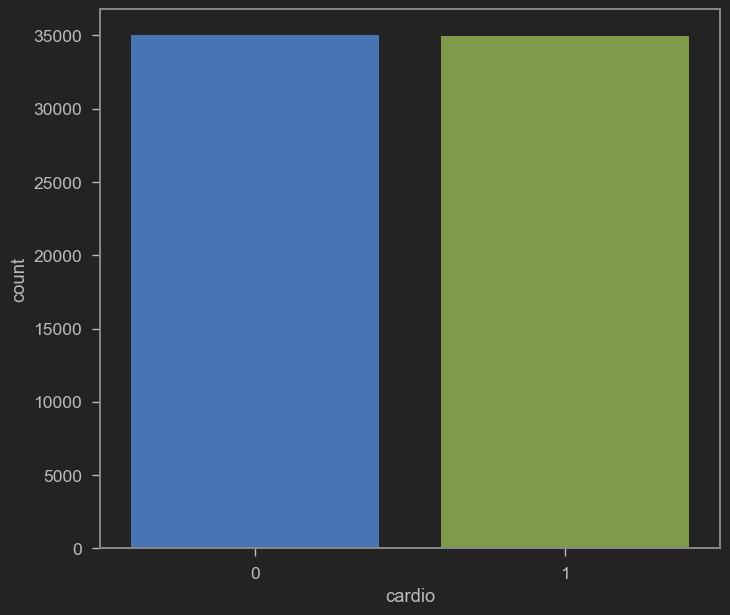

In [6]:
sns.countplot(x=df['cardio'])

We can visually see that the dataset is balanced with about equal number of patients with the cardiovascular disease (1) and those without the disease (0). 

In [9]:
df_cardio = df[df['cardio'] == 1]
df_cardio

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
15,24,16782,2,172,112.0,120,80,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,172,70.0,130,90,1,1,0,0,1,1
69994,99992,21074,1,165,80.0,150,80,1,1,0,0,1,1
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1


There are 34,979 patients with cariovascular disease in the dataset.

In [10]:
df_nocardio = df[df['cardio'] == 0]
df_nocardio

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69987,99979,18852,1,151,49.0,120,80,1,1,0,0,1,0
69988,99981,21978,1,160,59.0,110,70,1,1,0,0,1,0
69991,99988,20609,1,159,72.0,130,90,2,2,0,0,1,0
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0


There are 35,021 patients without cardiovascular disease in the dataset.

## EXPLORING AND VISUALIZING THE DATA

In [7]:
# Drop id as it is not necessary for analysis
df = df.drop(columns = 'id')

In [8]:
# since the age is given in days, convert it into years
df['age'] = df['age']/365

In [9]:
# Explore the first five rows in the DataFrame
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0


In [10]:
# Explore the last five rows in the DataFrame
df.tail()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,52.712329,2,168,76.0,120,80,1,1,1,0,1,0
69996,61.920548,1,158,126.0,140,90,2,2,0,0,1,1
69997,52.235616,2,183,105.0,180,90,3,1,0,1,0,1
69998,61.454795,1,163,72.0,135,80,1,2,0,0,0,1
69999,56.273973,1,170,72.0,120,80,2,1,0,0,1,0


In [16]:
# Generate statistical summary
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,53.339358,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,6.759594,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,29.583562,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.394521,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.980822,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.430137,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.967123,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
# Obtain dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  float64
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 6.4 MB


Result shows no null values and appropriate data types. 


<Axes: >

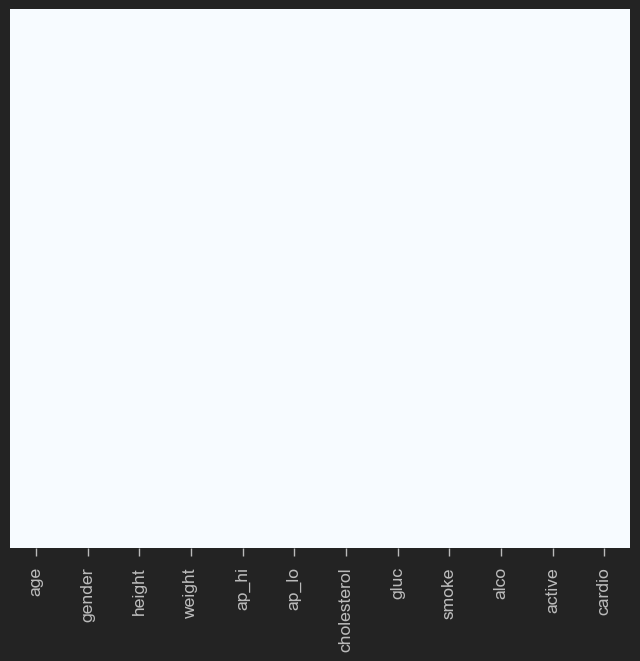

In [20]:
# check if there are any Null values - Extra check
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

Blank heatmap shows that there are truly no missing (null) values.

In [21]:
# check if there are any Null values - Extra check
df.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

Historgrams to look at the bivariate relationships between the two variables at a time. 

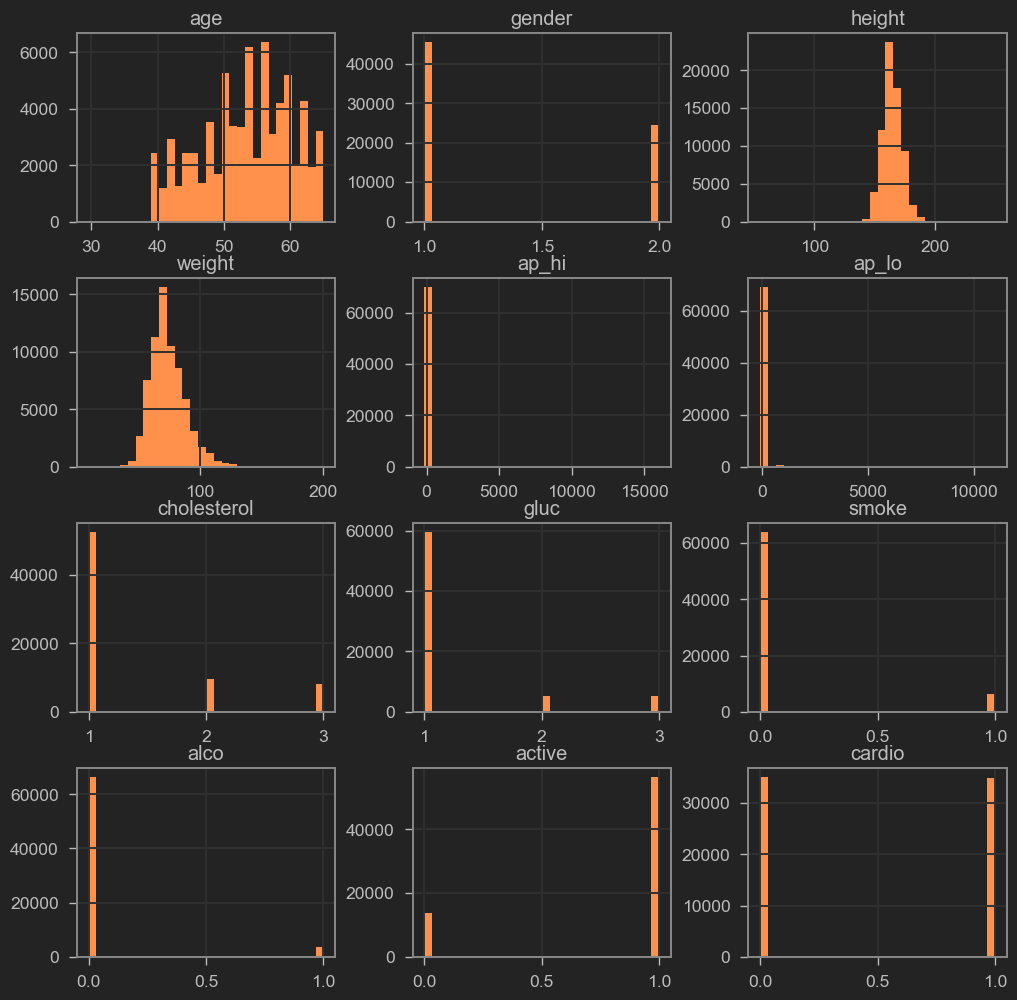

In [22]:
df.hist(bins = 30, figsize = (12, 12), color = 'y');

Histograms results:
- There are not may alcohol drinkers
- We have a balanced cardiovasuclar data set
- Majority are non-smokers


Pair plots: to visualize all the pairwise relationships in the data set.

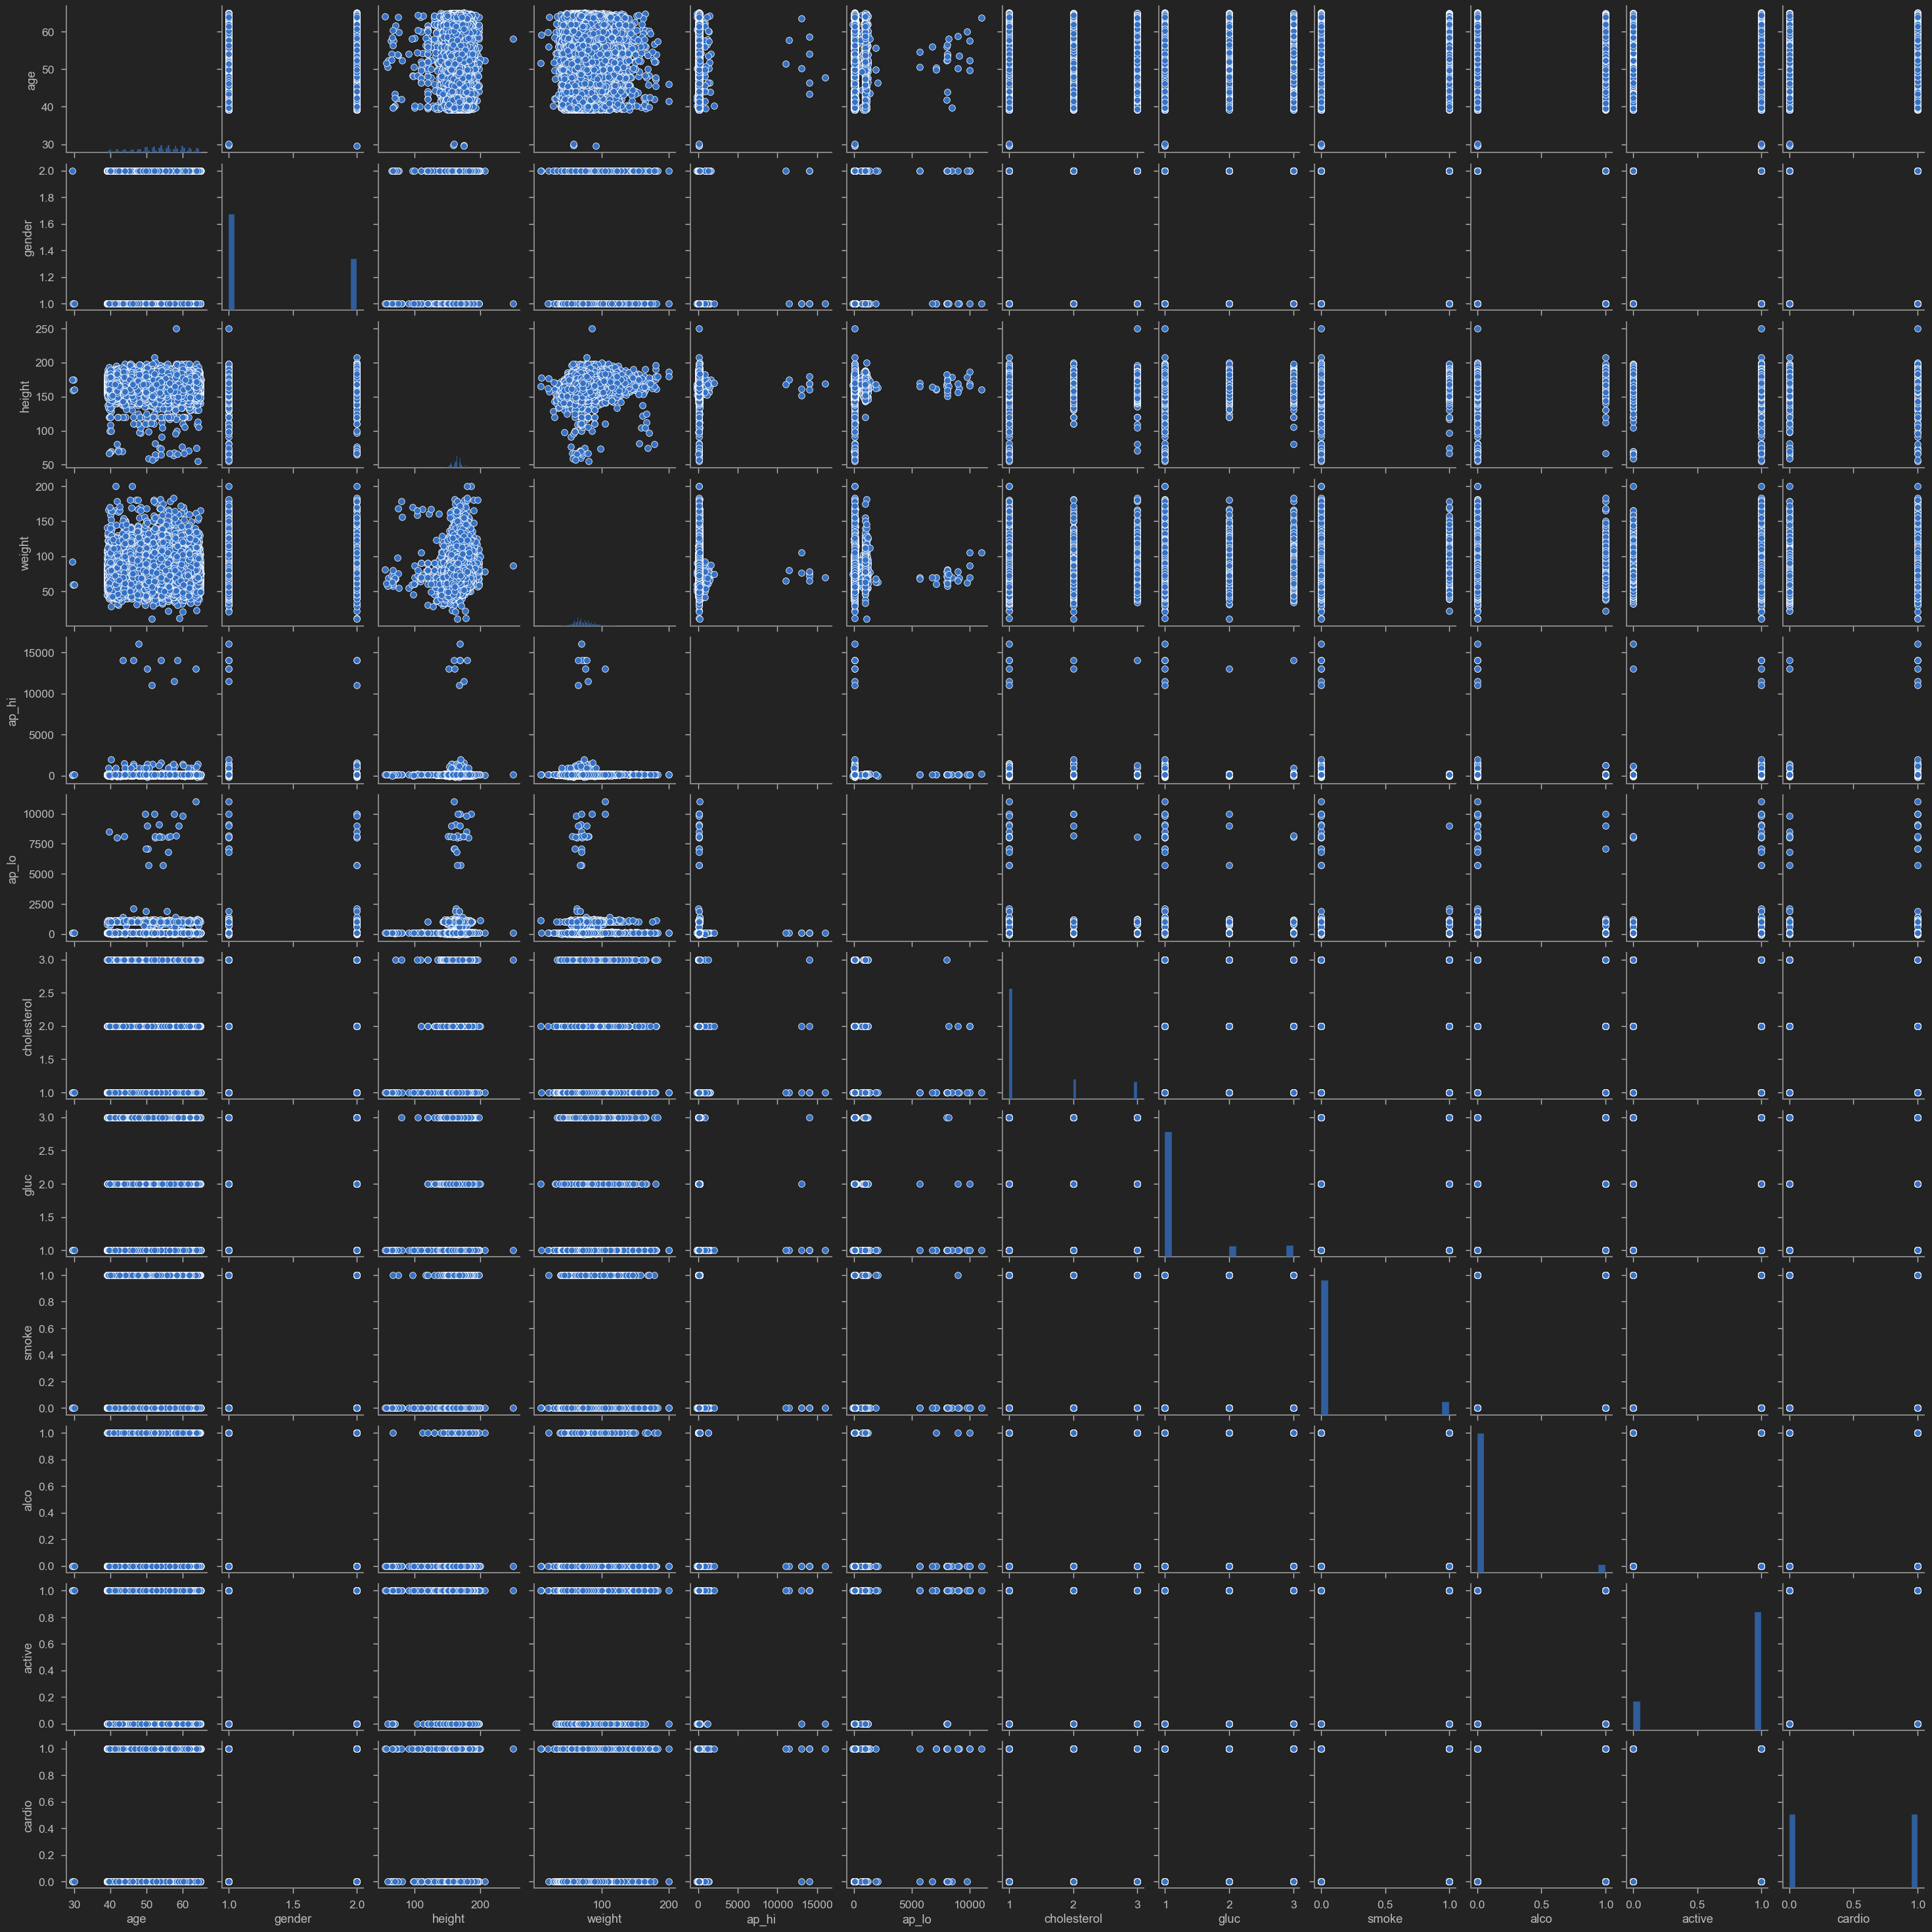

In [23]:
# plot pairplot
sns.pairplot(df);

Correlation matrix: to look at the strength of the relationship between the variables. 

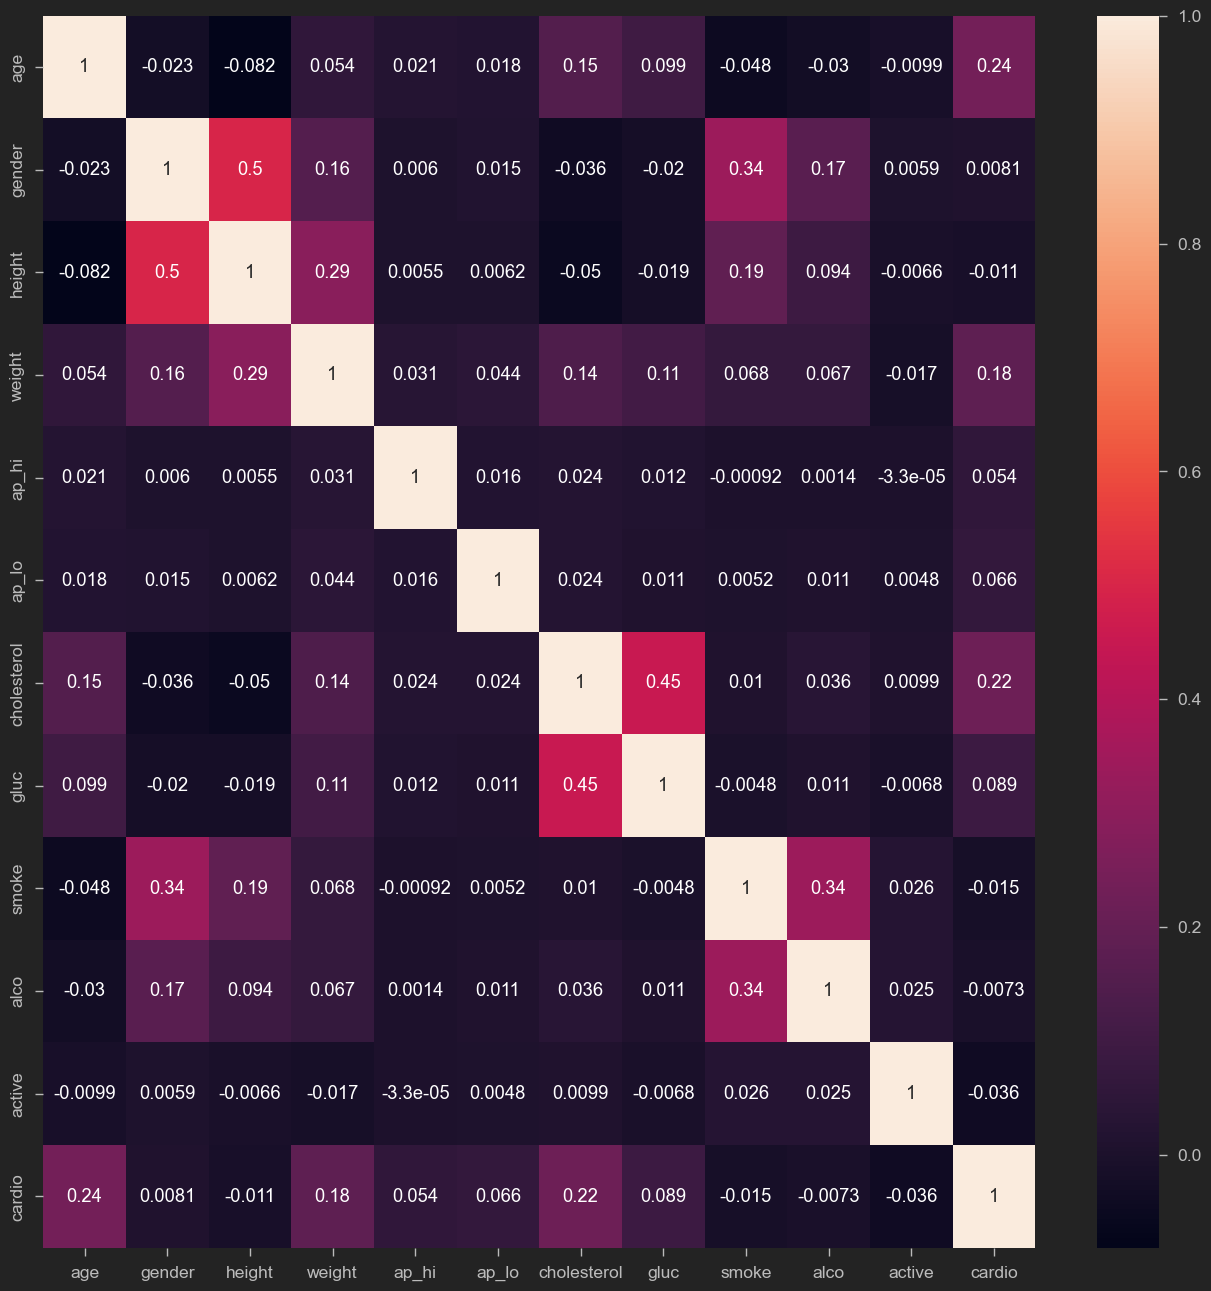

In [24]:
corr_matrix = df.corr()
# plotting the correlation matrix
plt.figure(figsize = (16,16))
sns.heatmap(corr_matrix, annot = True)
plt.show()

Correlation matrix relates all the features.
- There is a strong positive correlation of 0.45 between glucose and cholesterol levels.
- There is also a strong positive correlation of 0.50 between gender and height.

## UNDERSTANDING AWS AUTOGLUON FUNDAMENTALS

AutoGluon is modularixed into sub-modules which may be one of the following options:
1. autogluon.tabular - tabular data (TabularPredictor)
2. autogluon.vision - computer vision (ImagePredictor, ObjectDetector)
3. autogluon.text - natural language processing (TextPredictor)

AutoGluon Presets understanding
- Best quality: Best predictive accuracy with little consideration to inference time or disk usage.
- High quality fast inference only: High predictive accuracy with fast inference and lower disk usage than best quality. 
- Medium quality faster train: (Default Preset) Medium predictive accuracy with fast inference and very fast training time.
- Optimize for deployment: optimizes results for deployment by deleting unused models and removing training artifacts. Can reduce disk usage without impacting model accuracy or inference speed.



## TRAINING CLASSIFICATION MODELS USING AWS AUTOGLUON

In [11]:
# Split the data into 80% for training and 20% for testing using train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(df, test_size=0.2, random_state=0)

In [12]:
X_train

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
43395,64.172603,1,154,76.0,120,80,3,1,0,0,1,1
34399,53.463014,1,143,55.0,110,80,1,1,0,0,1,0
24774,57.191781,1,159,95.0,200,100,1,1,0,0,0,0
52089,46.167123,1,160,83.0,160,110,1,1,0,0,0,1
15390,54.309589,1,160,78.0,110,70,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
21243,63.805479,1,158,76.0,120,80,3,3,0,0,0,1
45891,63.961644,2,170,122.0,130,80,3,3,0,1,1,1
42613,61.328767,2,174,72.0,120,80,1,1,0,0,1,0
43567,50.194521,1,153,85.0,120,80,1,1,0,0,1,0


In [13]:
X_test

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
10840,41.687671,1,165,61.0,120,80,1,1,0,0,1,0
56267,54.287671,1,164,54.0,110,80,1,1,0,0,1,0
14849,56.336986,1,170,69.0,120,80,1,1,0,0,1,0
62726,45.547945,1,167,57.0,110,70,1,1,0,0,1,0
47180,39.591781,1,158,110.0,120,80,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
29357,59.967123,1,156,100.0,160,100,3,3,0,1,1,1
52488,48.024658,1,166,80.0,100,60,1,1,0,0,1,0
9603,61.594521,2,120,68.0,150,1000,2,1,0,0,0,1
34949,40.073973,2,169,79.0,120,80,1,1,1,0,1,0


In [14]:
# Train multiple ML regression models using AutoGluon
# Specify the target column 'cardio', train_data, limit_time, and presets 
# AutoGluon automatically detects if the problem is classification or regression type problems from the 'label' column

predictor = TabularPredictor(label = "cardio", problem_type = 'binary', eval_metric = 'accuracy').fit(train_data = X_train, time_limit = 200, presets = "medium_quality_faster_train")

No path specified. Models will be saved in: "AutogluonModels\ag-20230711_041137\"
Preset alias specified: 'medium_quality_faster_train' maps to 'medium_quality'.
Presets specified: ['medium_quality_faster_train']
Beginning AutoGluon training ... Time limit = 200s
AutoGluon will save models to "AutogluonModels\ag-20230711_041137\"
AutoGluon Version:  0.7.0
Python Version:     3.10.9
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22621
Train Data Rows:    56000
Train Data Columns: 11
Label Column: cardio
Preprocessing data ...
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    2540.72 MB
	Train Data (Original)  Memory Usage: 4.93 MB (0.2% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		

In [31]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2     0.7404       0.158476  134.177201                0.006001           2.541203            2       True         14
1               XGBoost     0.7376       0.027461    0.560361                0.027461           0.560361            1       True         11
2              LightGBM     0.7372       0.021194    6.880476                0.021194           6.880476            1       True          4
3              CatBoost     0.7368       0.015871    9.134796                0.015871           9.134796            1       True          7
4        NeuralNetTorch     0.7352       0.042000   40.844128                0.042000          40.844128            1       True         12
5       NeuralNetFastAI     0.7348       0.067142   81.096713                0.067142          81.

{'model_types': {'KNeighborsUnif': 'KNNModel',
  'KNeighborsDist': 'KNNModel',
  'LightGBMXT': 'LGBModel',
  'LightGBM': 'LGBModel',
  'RandomForestGini': 'RFModel',
  'RandomForestEntr': 'RFModel',
  'CatBoost': 'CatBoostModel',
  'ExtraTreesGini': 'XTModel',
  'ExtraTreesEntr': 'XTModel',
  'NeuralNetFastAI': 'NNFastAiTabularModel',
  'XGBoost': 'XGBoostModel',
  'NeuralNetTorch': 'TabularNeuralNetTorchModel',
  'LightGBMLarge': 'LGBModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif': 0.6804,
  'KNeighborsDist': 0.6748,
  'LightGBMXT': 0.728,
  'LightGBM': 0.7372,
  'RandomForestGini': 0.712,
  'RandomForestEntr': 0.7128,
  'CatBoost': 0.7368,
  'ExtraTreesGini': 0.7152,
  'ExtraTreesEntr': 0.72,
  'NeuralNetFastAI': 0.7348,
  'XGBoost': 0.7376,
  'NeuralNetTorch': 0.7352,
  'LightGBMLarge': 0.7344,
  'WeightedEnsemble_L2': 0.7404},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'KNeighborsUnif': 'AutogluonModels\\ag-20230531_213

- Best performing model is the WeightedEnsemble_L2 with about 74% accuracy
- least performing model is the  KNeighborsDist with about 67% accuracy


## EVALUATING TRAINED MODELS PERFORMANCE

In [33]:
predictor.leaderboard()  #print the leaderboard table with validation scores

                  model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2     0.7404       0.158476  134.177201                0.006001           2.541203            2       True         14
1               XGBoost     0.7376       0.027461    0.560361                0.027461           0.560361            1       True         11
2              LightGBM     0.7372       0.021194    6.880476                0.021194           6.880476            1       True          4
3              CatBoost     0.7368       0.015871    9.134796                0.015871           9.134796            1       True          7
4        NeuralNetTorch     0.7352       0.042000   40.844128                0.042000          40.844128            1       True         12
5       NeuralNetFastAI     0.7348       0.067142   81.096713                0.067142          81.096713            1       True         10
6         LightGBMLa

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,0.7404,0.158476,134.177201,0.006001,2.541203,2,True,14
1,XGBoost,0.7376,0.027461,0.560361,0.027461,0.560361,1,True,11
2,LightGBM,0.7372,0.021194,6.880476,0.021194,6.880476,1,True,4
3,CatBoost,0.7368,0.015871,9.134796,0.015871,9.134796,1,True,7
4,NeuralNetTorch,0.7352,0.042000,40.844128,0.042000,40.844128,1,True,12
5,NeuralNetFastAI,0.7348,0.067142,81.096713,0.067142,81.096713,1,True,10
6,LightGBMLarge,0.7344,0.037552,1.485347,0.037552,1.485347,1,True,13
7,LightGBMXT,0.7280,0.045707,7.183276,0.045707,7.183276,1,True,3
8,ExtraTreesEntr,0.7200,0.343824,5.850400,0.343824,5.850400,1,True,9
9,ExtraTreesGini,0.7152,0.438954,6.619335,0.438954,6.619335,1,True,8


                  model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2     0.7404       0.158476  134.177201                0.006001           2.541203            2       True         14
1               XGBoost     0.7376       0.027461    0.560361                0.027461           0.560361            1       True         11
2              LightGBM     0.7372       0.021194    6.880476                0.021194           6.880476            1       True          4
3              CatBoost     0.7368       0.015871    9.134796                0.015871           9.134796            1       True          7
4        NeuralNetTorch     0.7352       0.042000   40.844128                0.042000          40.844128            1       True         12
5       NeuralNetFastAI     0.7348       0.067142   81.096713                0.067142          81.096713            1       True         10
6         LightGBMLa

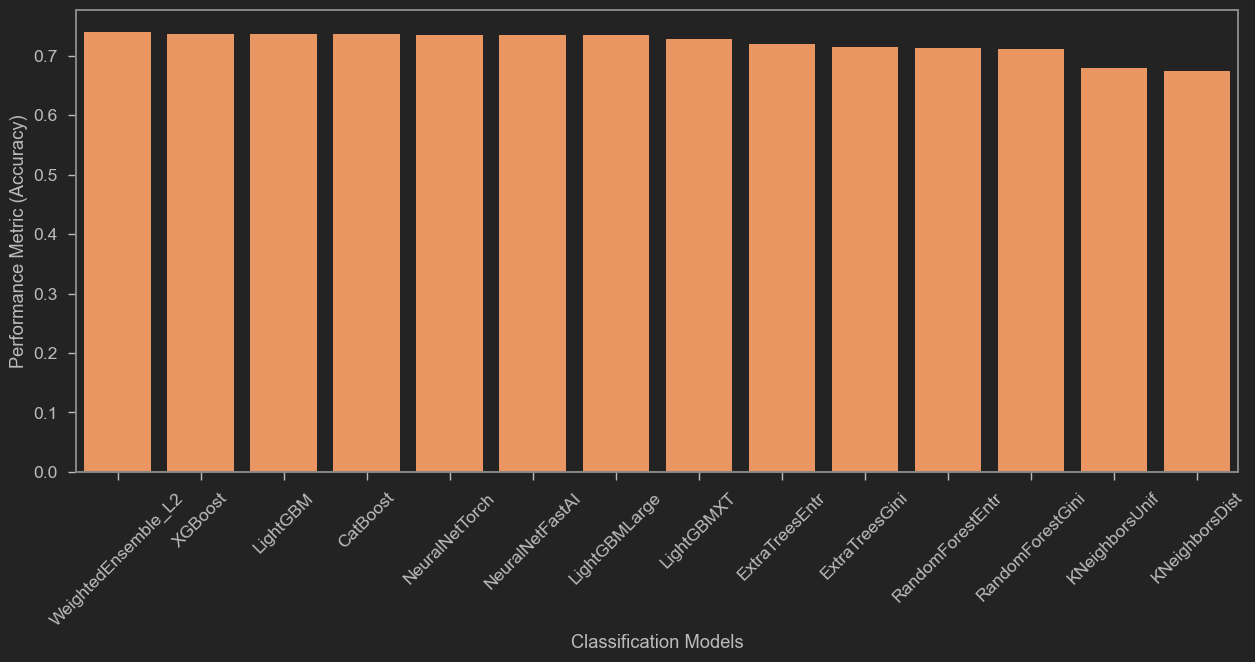

In [34]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize = (15, 6))
sns.barplot(x = "model", y = "score_val", data = predictor.leaderboard(), color = "y")
ax.set(ylabel = "Performance Metric (Accuracy)", xlabel = "Classification Models")
plt.xticks(rotation = 45);


In [35]:
# assess model performance on independent dataset the model has not yet seen during training (the 20%)
y_pred = predictor.predict(X_test)
y_pred

10840    0
56267    0
14849    0
62726    0
47180    0
        ..
29357    1
52488    0
9603     1
34949    0
25193    1
Name: cardio, Length: 14000, dtype: int64

In [36]:
X_test

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
10840,41.687671,1,165,61.0,120,80,1,1,0,0,1,0
56267,54.287671,1,164,54.0,110,80,1,1,0,0,1,0
14849,56.336986,1,170,69.0,120,80,1,1,0,0,1,0
62726,45.547945,1,167,57.0,110,70,1,1,0,0,1,0
47180,39.591781,1,158,110.0,120,80,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
29357,59.967123,1,156,100.0,160,100,3,3,0,1,1,1
52488,48.024658,1,166,80.0,100,60,1,1,0,0,1,0
9603,61.594521,2,120,68.0,150,1000,2,1,0,0,0,1
34949,40.073973,2,169,79.0,120,80,1,1,1,0,1,0


In [37]:
y_test = X_test['cardio']
y_test #groundtruth

10840    0
56267    0
14849    0
62726    0
47180    0
        ..
29357    1
52488    0
9603     1
34949    0
25193    1
Name: cardio, Length: 14000, dtype: int64

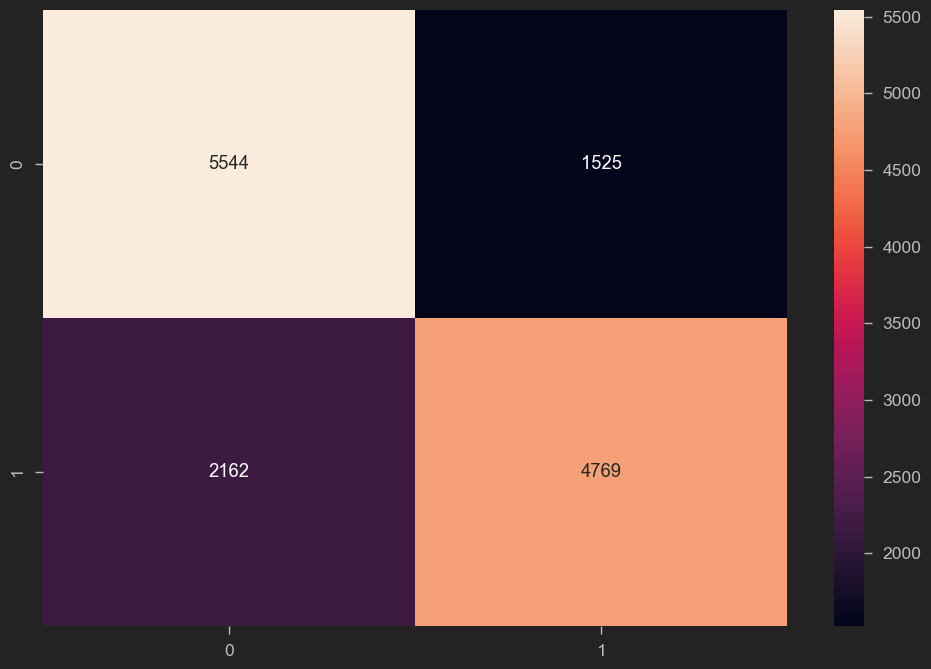

In [38]:
# Training set Performance
from sklearn.metrics import confusion_matrix

# Testing Set Performance
plt.figure(figsize = (12, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, fmt = 'd', annot=True);

If model prediction (y_pred) matches ground truth data (y_test) then the model performed well.

- The model correctly classified 5544 as not having cardio vasular disease (True Negative)
- The model correctly classified 4769 as having cardiovascular disease (True Positive)

- The model misclassified 1525 and not having cardiovascular disease but they actually had the disease (False Negative)
- The model misclassified 2162 has having cardiovascular disease but they did not have the disease in reality (False Positive)


In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.78      0.75      7069
           1       0.76      0.69      0.72      6931

    accuracy                           0.74     14000
   macro avg       0.74      0.74      0.74     14000
weighted avg       0.74      0.74      0.74     14000



- The model accuacy is 74% on the testing set
- The overall the precision and recall scores shows that the model performed just ok, but could have been better.
- The f1-score (harmonic mean beteween prediction and recall) was 75%


- **Changing the preset value to 'optimize for deployment' and retrain the model to compare the model accuracy using various preset values** 

No path specified. Models will be saved in: "AutogluonModels\ag-20230531_215411\"
Presets specified: ['optimize_for_deployment']
Beginning AutoGluon training ... Time limit = 400s
AutoGluon will save models to "AutogluonModels\ag-20230531_215411\"
AutoGluon Version:  0.7.0
Python Version:     3.10.9
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22621
Train Data Rows:    56000
Train Data Columns: 11
Label Column: cardio
Preprocessing data ...
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    3246.0 MB
	Train Data (Original)  Memory Usage: 4.93 MB (0.2% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 4 features to boolean dtype as 

*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L2     0.7400       0.066884  215.471675                0.007547           2.516391            2       True          3
1       NeuralNetTorch     0.7388       0.035519  212.278589                0.035519         212.278589            1       True          2
2              XGBoost     0.7376       0.023818    0.676695                0.023818           0.676695            1       True          1
Number of models trained: 3
Types of models trained:
{'TabularNeuralNetTorchModel', 'XGBoostModel', 'WeightedEnsembleModel'}
Bagging used: False 
Multi-layer stack-ensembling used: False 
Feature Metadata (Processed):
(raw dtype, special dtypes):
('float', [])     : 2 | ['age', 'weight']
('int', [])       : 5 | ['height', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc']
('int', ['bool'])

Evaluation: accuracy on test data: 0.7362857142857143
Evaluations on test data:
{
    "accuracy": 0.7362857142857143,
    "balanced_accuracy": 0.7356869103138777,
    "mcc": 0.4751463479295437,
    "roc_auc": 0.80167645472655,
    "f1": 0.71704475781729,
    "precision": 0.7647539643616151,
    "recall": 0.6749386812869715
}


{'accuracy': 0.7362857142857143,
 'balanced_accuracy': 0.7356869103138777,
 'mcc': 0.4751463479295437,
 'roc_auc': 0.80167645472655,
 'f1': 0.71704475781729,
 'precision': 0.7647539643616151,
 'recall': 0.6749386812869715}

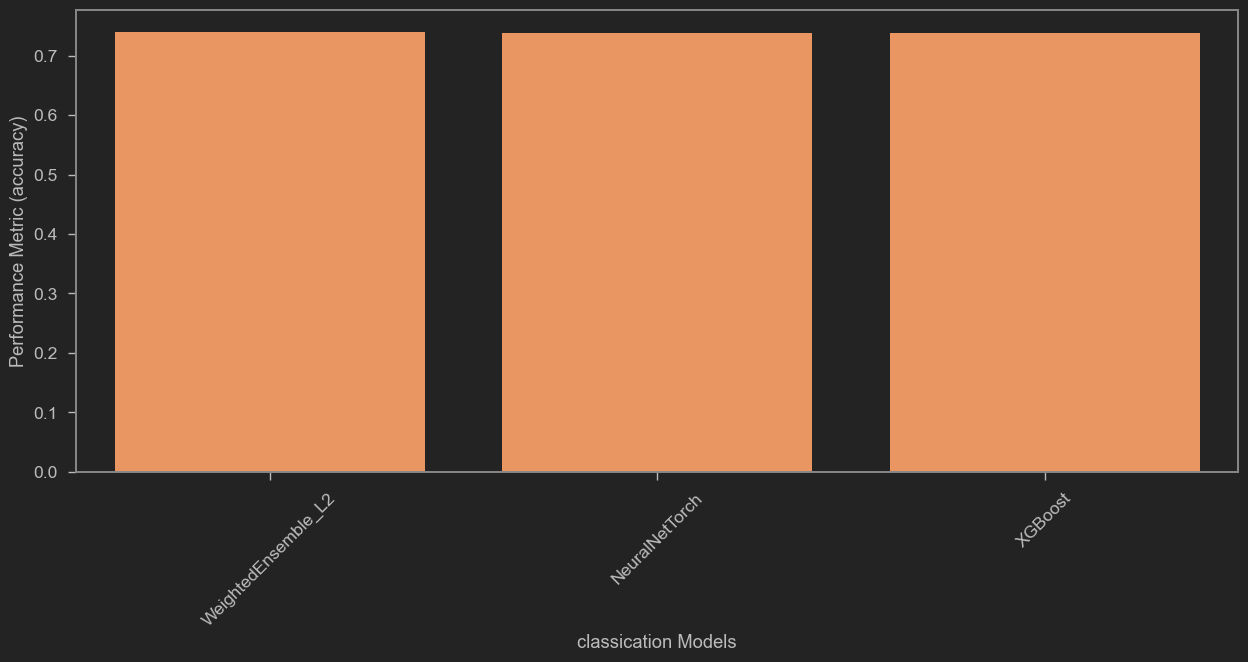

In [40]:
predictor = TabularPredictor(label = "cardio", problem_type = 'binary', eval_metric = 'accuracy').fit(train_data = X_train, time_limit = 400, presets = "optimize_for_deployment")
predictor.fit_summary()
predictor.leaderboard()

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize = (15, 6))
sns.barplot(x = "model", y = "score_val", data = predictor.leaderboard(), color = "y")
ax.set(ylabel = "Performance Metric (accuracy)", xlabel = "classication Models")
plt.xticks(rotation = 45);

predictor.evaluate(X_test)

- The best performing model with preset set to "optimize_for_deployment" was **WeightedEnsemble_L2 with 74.00% accuracy**.
- Therefore there was no difference in accuracy when the preset was set to "medium_quality_faster_train" or "optimize_for_deployment". 


# BINARY CLASSIFICATION ON CANCER CELLS USING AUTOGLUON ALOGRITHM

- Benchmark dataset with features related to various tumors.
- Based on these features the doctor can indicate if the tumor is malignant or cancerous.


## 1. Load the “cancer.csv” dataset

In [41]:
# import the csv files using pandas 
cancer_df = pd.read_csv('cancer.csv')

## 2. Perform basic Exploratory Data Analysis

In [43]:
# Explore the first five rows in the DataFrame
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [44]:
# Generate statistical summary
cancer_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [45]:
# Obtain dataset information
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

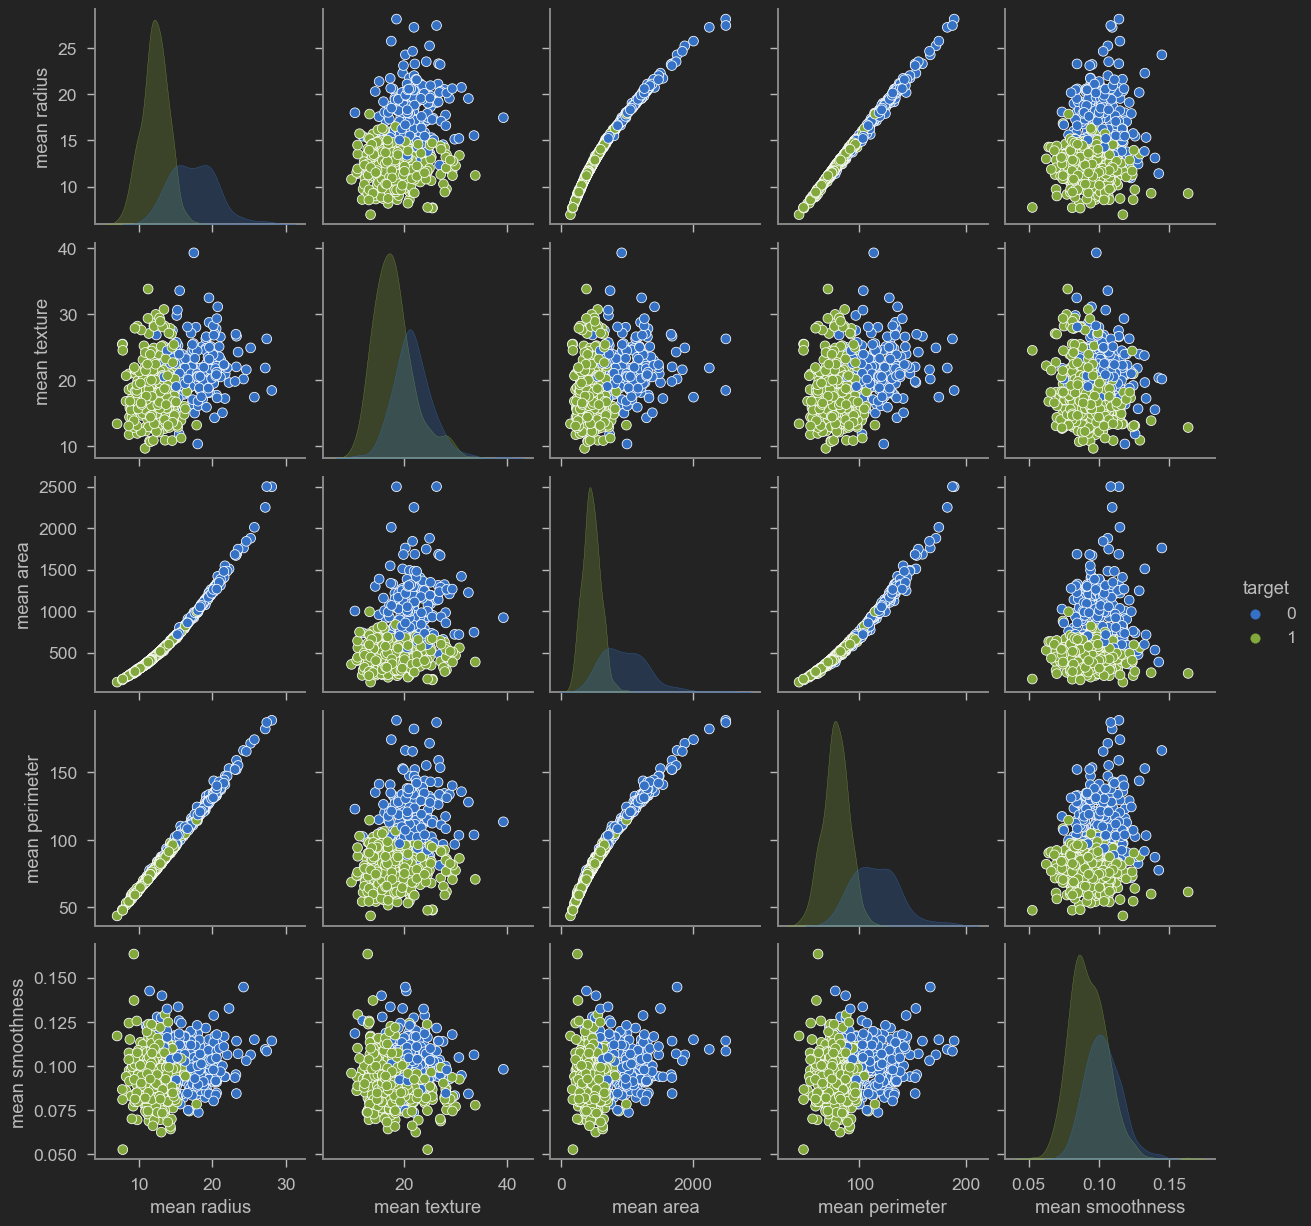

In [46]:
sns.pairplot(cancer_df, hue = 'target', vars = ['mean radius', 'mean texture', 'mean area', 'mean perimeter', 'mean smoothness'] );

- The mean radius, mean area and mean perimeter for target class 0 (Blue - Cancer Absent) is larger compared to target class 1 (Green - Cancer Present).

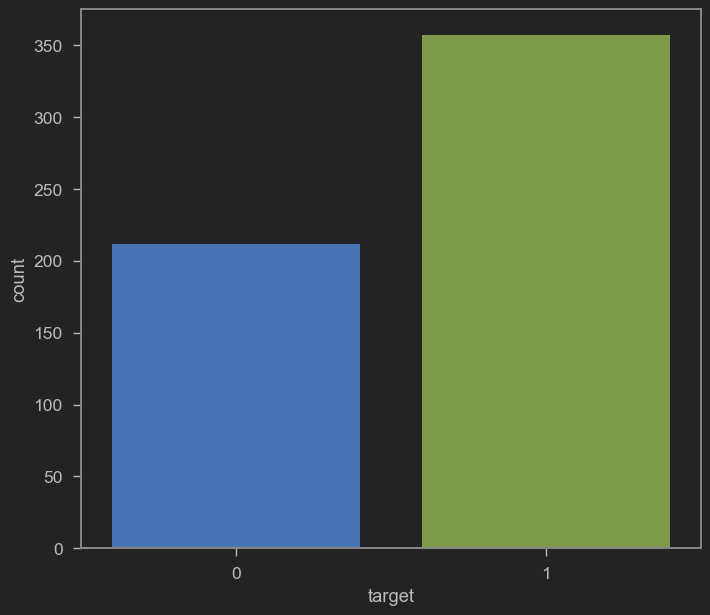

In [49]:
sns.countplot(x= cancer_df['target'], label = "Count"); 

- This shows that we are working with  unbalanced data - class 1 (Cancer present) is higher than class 0 (Cancer absent).

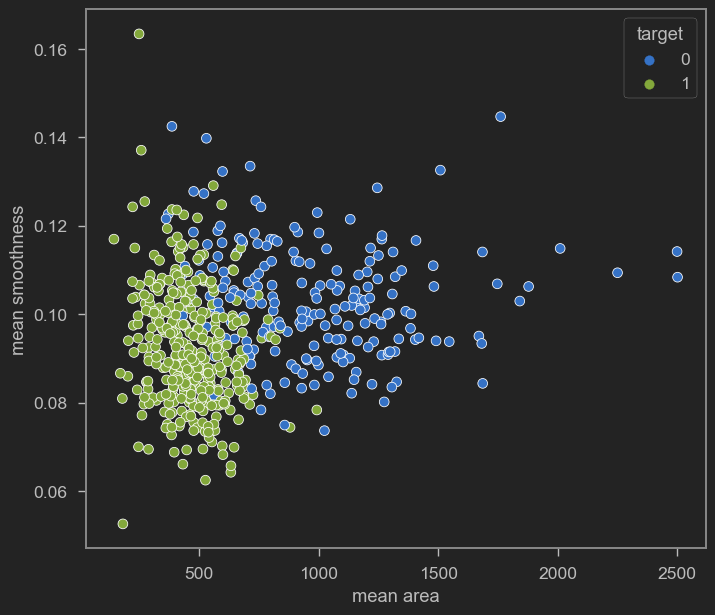

In [50]:
sns.scatterplot(x = 'mean area', y = 'mean smoothness', hue = 'target', data = cancer_df);

<Axes: >

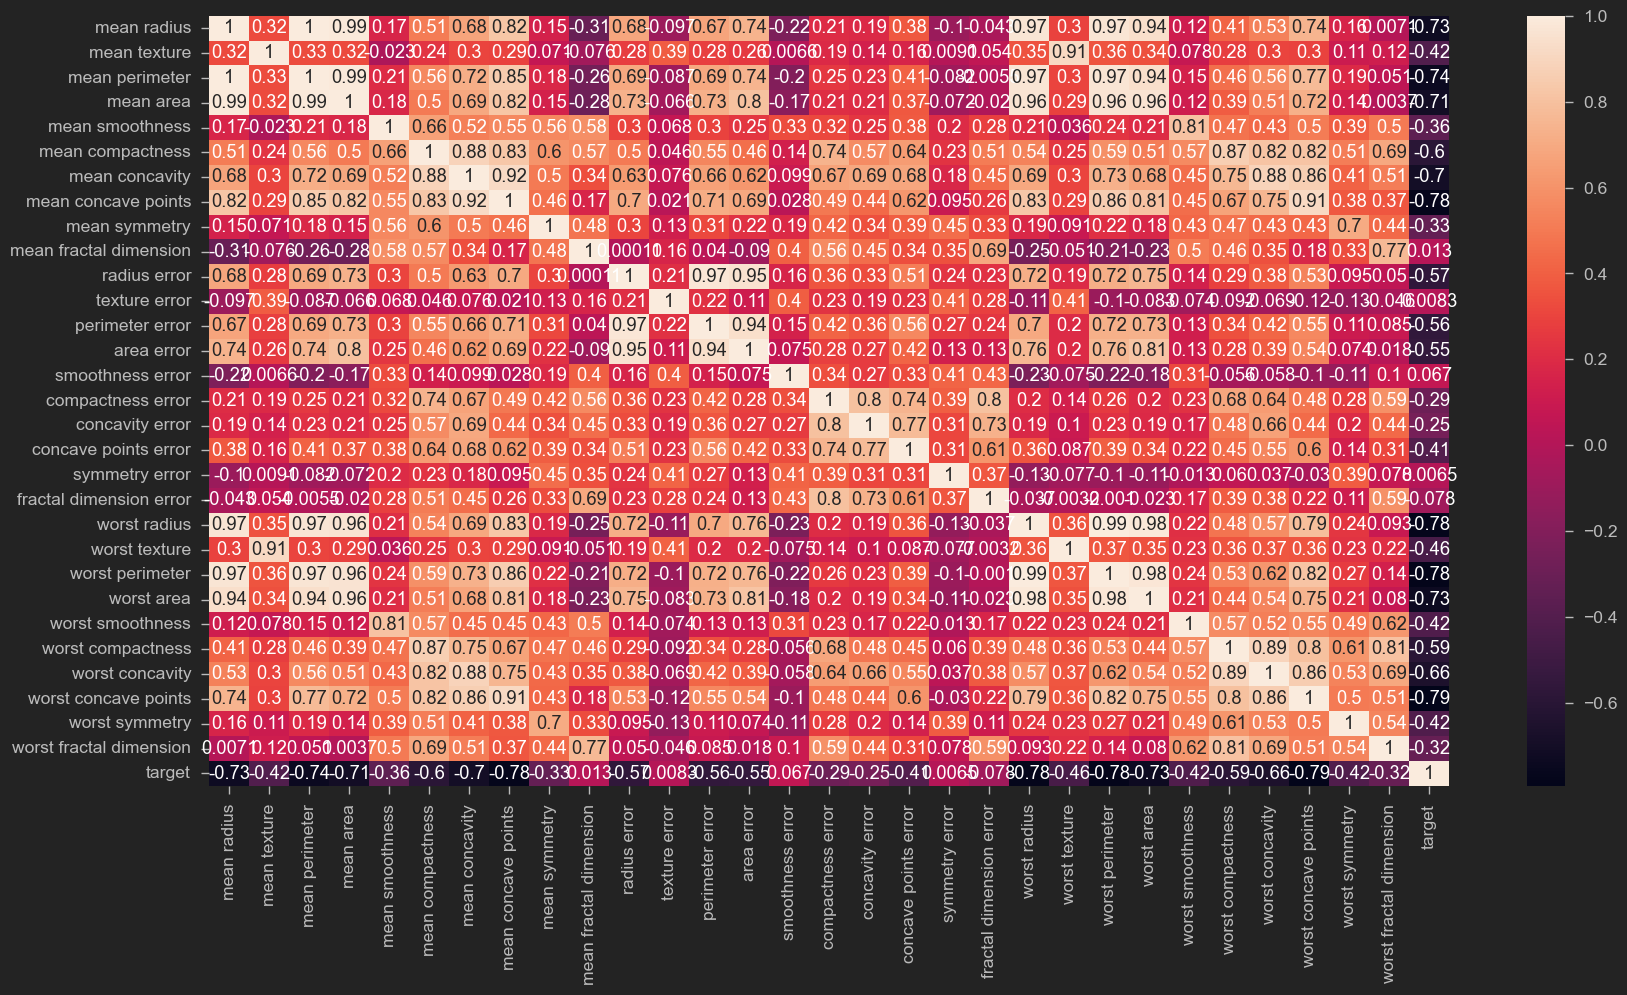

In [51]:
# Let's check the correlation between the variables 
# Strong correlation between the mean radius and mean perimeter, mean area and mean primeter
plt.figure(figsize=(20,10)) 
sns.heatmap(cancer_df.corr(), annot=True) 

- There is a Strong Positive correlation of 0.99 between radius error and mean perimeter.
- There is a strong positive correlation of 0.99 between mean area and mean radius. This is very reasonable because the area is calculated using the radius. 

## 3. Split the data into 80% for training and 20% for testing 

In [52]:
# Split the data into 80% for training and 20% for testing using train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(cancer_df, test_size = 0.2, random_state = 0)

## 4. Using ‘best_quality’ preset and accuracy metric, train machine linear classification models using AutoGluon to predict the “class” column 

In [53]:
# Train multiple ML classifier models using AutoGluon
# You need to specify the target column, train_data, limit_time, and presets 
# Note that AutoGluon automatically detects if the problem is classification or regression type problems from the 'label' column

predictor = TabularPredictor(label = "target", problem_type = 'binary', eval_metric = 'accuracy').fit(train_data = X_train, time_limit = 200, presets = "best_quality")

No path specified. Models will be saved in: "AutogluonModels\ag-20230601_024113\"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=0, num_bag_folds=5, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 200s
AutoGluon will save models to "AutogluonModels\ag-20230601_024113\"
AutoGluon Version:  0.7.0
Python Version:     3.10.9
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22621
Train Data Rows:    455
Train Data Columns: 30
Label Column: target
Preprocessing data ...
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    2658.76 MB
	Train Data (Original)  Memory Usage: 0.11 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitti

In [54]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                      model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0       WeightedEnsemble_L2   0.982418       0.436811  13.367357                0.002002           2.782952            2       True         14
1    NeuralNetFastAI_BAG_L1   0.980220       0.107105   8.999750                0.107105           8.999750            1       True         10
2         LightGBMXT_BAG_L1   0.978022       0.011873   4.746808                0.011873           4.746808            1       True          3
3     ExtraTreesGini_BAG_L1   0.975824       0.175485   0.989706                0.175485           0.989706            1       True          8
4     NeuralNetTorch_BAG_L1   0.975824       0.257217  11.410266                0.257217          11.410266            1       True         12
5           LightGBM_BAG_L1   0.973626       0.016516   4.645666                

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestGini_BAG_L1': 'StackerEnsembleModel_RF',
  'RandomForestEntr_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesGini_BAG_L1': 'StackerEnsembleModel_XT',
  'ExtraTreesEntr_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'NeuralNetTorch_BAG_L1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'LightGBMLarge_BAG_L1': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': 0.9230769230769231,
  'KNeighborsDist_BAG_L1': 0.9208791208791208,
  'LightGBMXT_BAG_L1': 0.978021978021978,
  'LightGBM_BAG_L1': 0.9736263736263736,
  'Ra

In [55]:
predictor.leaderboard()

                      model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0       WeightedEnsemble_L2   0.982418       0.436811  13.367357                0.002002           2.782952            2       True         14
1    NeuralNetFastAI_BAG_L1   0.980220       0.107105   8.999750                0.107105           8.999750            1       True         10
2         LightGBMXT_BAG_L1   0.978022       0.011873   4.746808                0.011873           4.746808            1       True          3
3     ExtraTreesGini_BAG_L1   0.975824       0.175485   0.989706                0.175485           0.989706            1       True          8
4     NeuralNetTorch_BAG_L1   0.975824       0.257217  11.410266                0.257217          11.410266            1       True         12
5           LightGBM_BAG_L1   0.973626       0.016516   4.645666                0.016516           4.645666            1       True          4

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,0.982418,0.436811,13.367357,0.002002,2.782952,2,True,14
1,NeuralNetFastAI_BAG_L1,0.980220,0.107105,8.999750,0.107105,8.999750,1,True,10
2,LightGBMXT_BAG_L1,0.978022,0.011873,4.746808,0.011873,4.746808,1,True,3
3,ExtraTreesGini_BAG_L1,0.975824,0.175485,0.989706,0.175485,0.989706,1,True,8
4,NeuralNetTorch_BAG_L1,0.975824,0.257217,11.410266,0.257217,11.410266,1,True,12
5,LightGBM_BAG_L1,0.973626,0.016516,4.645666,0.016516,4.645666,1,True,4
6,CatBoost_BAG_L1,0.973626,0.024983,14.548932,0.024983,14.548932,1,True,7
7,XGBoost_BAG_L1,0.964835,0.044259,2.805587,0.044259,2.805587,1,True,11
8,ExtraTreesEntr_BAG_L1,0.964835,0.133554,0.964709,0.133554,0.964709,1,True,9
9,RandomForestEntr_BAG_L1,0.960440,0.286679,1.326179,0.286679,1.326179,1,True,6


- The best performing model was WeightedEnsemble_L2 with a validity score of 98%
- The worst performing model was KNeighborsDist_BAG_L1 with a validity score of 92%

                      model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0       WeightedEnsemble_L2   0.982418       0.436811  13.367357                0.002002           2.782952            2       True         14
1    NeuralNetFastAI_BAG_L1   0.980220       0.107105   8.999750                0.107105           8.999750            1       True         10
2         LightGBMXT_BAG_L1   0.978022       0.011873   4.746808                0.011873           4.746808            1       True          3
3     ExtraTreesGini_BAG_L1   0.975824       0.175485   0.989706                0.175485           0.989706            1       True          8
4     NeuralNetTorch_BAG_L1   0.975824       0.257217  11.410266                0.257217          11.410266            1       True         12
5           LightGBM_BAG_L1   0.973626       0.016516   4.645666                0.016516           4.645666            1       True          4

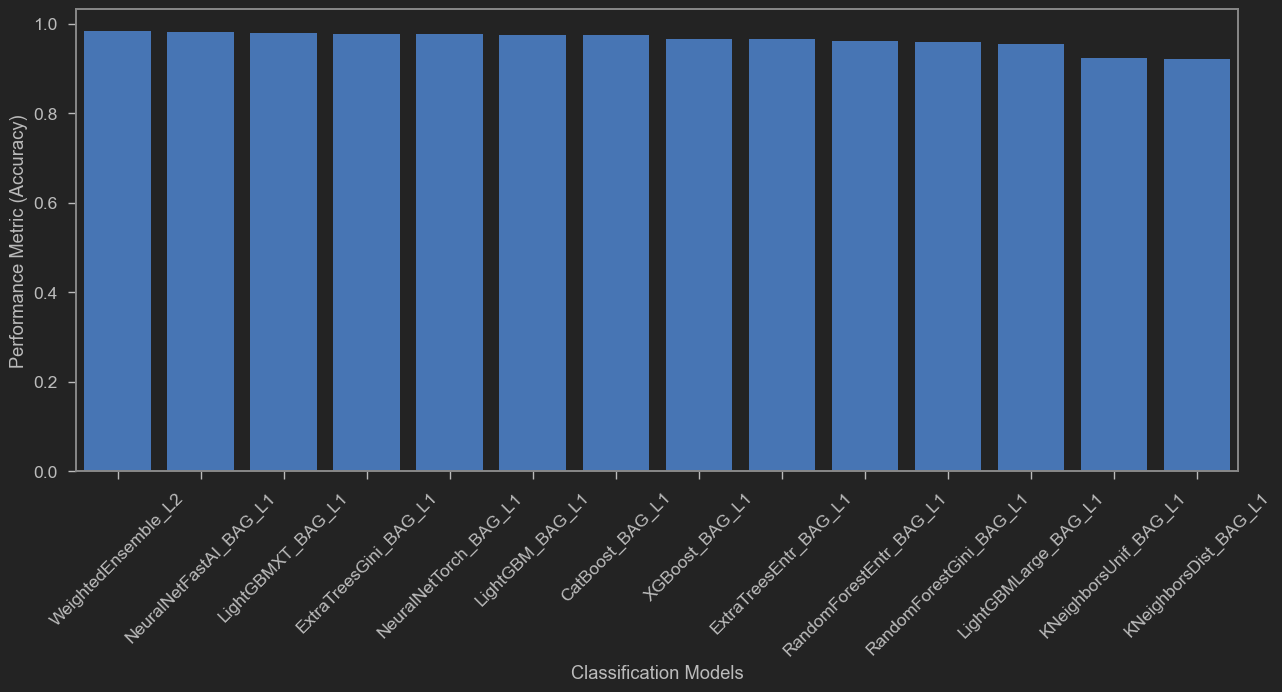

In [62]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize = (15, 6))
sns.barplot(x = "model", y = "score_val", data = predictor.leaderboard(), color = "b")
ax.set(ylabel = "Performance Metric (Accuracy)", xlabel = "Classification Models")
plt.xticks(rotation = 45);


In [57]:
predictor.evaluate(X_test)

Evaluation: accuracy on test data: 0.9736842105263158
Evaluations on test data:
{
    "accuracy": 0.9736842105263158,
    "balanced_accuracy": 0.9712607176881549,
    "mcc": 0.9456799777237261,
    "roc_auc": 0.9977770720863767,
    "f1": 0.9777777777777777,
    "precision": 0.9705882352941176,
    "recall": 0.9850746268656716
}


{'accuracy': 0.9736842105263158,
 'balanced_accuracy': 0.9712607176881549,
 'mcc': 0.9456799777237261,
 'roc_auc': 0.9977770720863767,
 'f1': 0.9777777777777777,
 'precision': 0.9705882352941176,
 'recall': 0.9850746268656716}

- Model performed extremely well with accuracy score of 97%

## 5. Assess trained models performance by plotting the leaderboard and indicating the best model. Plot the confusion matrix

In [58]:
# assess model performance
y_pred = predictor.predict(X_test)
y_pred

512    0
457    1
439    1
298    1
37     1
      ..
213    0
519    1
432    0
516    0
500    1
Name: target, Length: 114, dtype: int64

In [63]:
y_test = X_test['target']
y_test  #groundtruth

512    0
457    1
439    1
298    1
37     1
      ..
213    0
519    1
432    0
516    0
500    1
Name: target, Length: 114, dtype: int64

<Axes: >

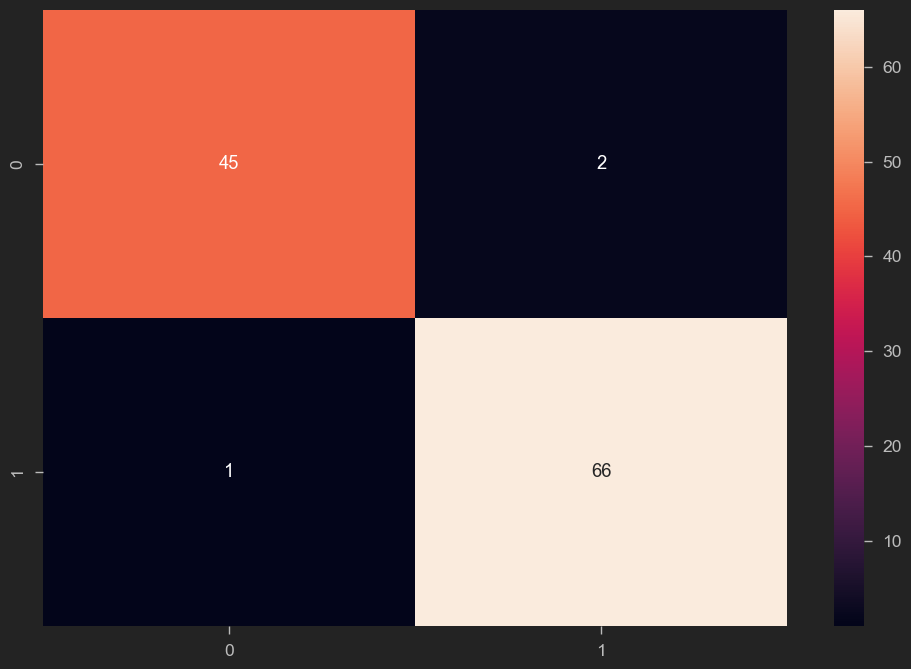

In [60]:
# Training set Performance
from sklearn.metrics import confusion_matrix
# Testing Set Performance
plt.figure(figsize = (12, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)


- Model correctly classified 111 samples - 45 (True Negative) as not having  and 66 (True Positive)
- Model misclassified 3 samples - 2 (False Negative) and 1 (False Positive)

In [61]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        47
           1       0.97      0.99      0.98        67

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



- The accuracy score on the testing dataset was 98% which shows the model performed extremely well 